# べき分布を描く

- 両対数変換して描画
- PDF は logarithmic binning して推定

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# comment out below
import json
def dict2rc(dict): return {f'{k1}.{k2}': v for k1, d in dict.items() for k2, v in d.items()}
with open('mpl_rc.json') as f:
    plt.rcParams.update(dict2rc(json.load(f)))
plt.style.use('dracula')

In [24]:
# path = '../data/the_art_of_readable_code.txt'  # 246KB
path = '../data/all_python_docs.txt'  # 7.7M
words = pd.read_csv(path, header=None)[0]
words.head()

0        the
1     python
2          c
3        api
4    release
Name: 0, dtype: object

In [25]:
# 単語の出現頻度を計算
frequencies = words.value_counts()
frequencies.head()

the    78614
a      32427
to     28190
is     27083
in     25770
Name: 0, dtype: int64

## CDF

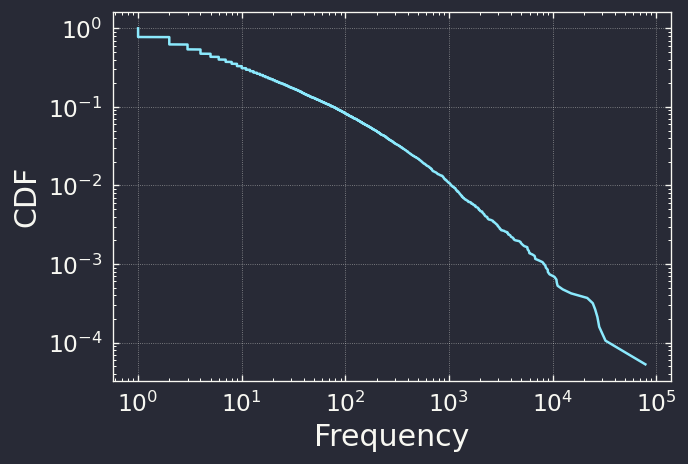

In [17]:
def draw_cdf(xs):
    n = len(xs)
    cdf = [(i+1)/n for i in range(n)]
    plt.plot(sorted(xs, reverse=True), cdf)
    plt.xlabel('Frequency')
    plt.ylabel('CDF')
    plt.xscale('log')
    plt.yscale('log')

draw_cdf(frequencies)


## PDF

- ヒストグラム法
- 対数軸で等幅のbinを取る (logarithmic binning)

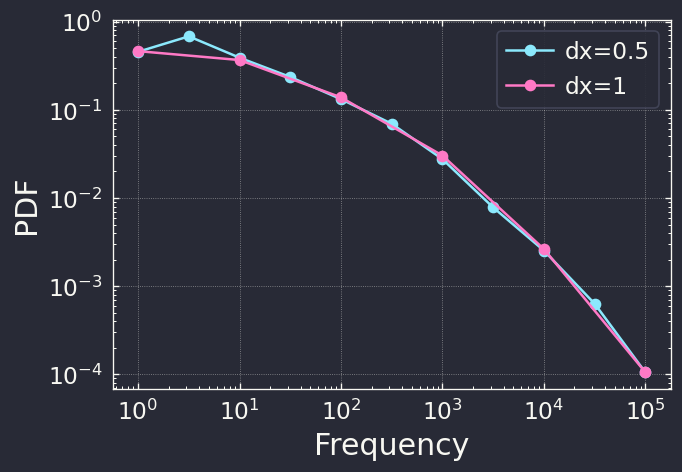

In [26]:
def calc_pdf(xs_raw, dx=1):
    # xs_raw: データの１次元配列（対数変換前）
    # dx: bin幅 (対数軸上)

    # データを対数変換
    xs = np.log10(xs_raw)

    xmin = int(min(xs)) - dx/2  # binの中央値を整数にするための調整
    nbin = int((max(xs) - xmin) / dx) + 1  # binの数
    counter = {index: 0 for index in range(nbin)}

    for x in xs:
        index = int((x-xmin) / dx)
        counter[index] += 1

    pdf = dict()
    N = len(xs) * dx # 規格化定数
    for index, count in counter.items():
        xbin = np.power(10, xmin + (index+0.5) * dx)
        pdf[xbin] = count / N

    return pdf


def draw_pdf(pdf, label=None, kind='line'):
    x = pdf.keys()
    p = pdf.values()

    if kind == 'line':
        plt.plot(x, p, marker='o', label=label)
    if kind == 'bar':
        plt.bar(x, p, label=label, zorder=2)
    
    plt.xlabel('Frequency')
    plt.ylabel('PDF')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()


for dx in [0.5, 1]:
    pdf = calc_pdf(frequencies, dx=dx)
    draw_pdf(pdf, label=f'dx={dx}')